#*TensorFlow:* 
#*Classify images of clothing*

https://www.tensorflow.org/tutorials/keras/classification 
--> Run in Google Colab

#**1. Library**

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


#**2. Load data (train images, train labels - text images, text labels)**

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



---


Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:







In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

NOTE: Label 	Class

0 	T-shirt/top

1 	Trouser

2 	Pullover

3 	Dress

4 	Coat

5 	Sandal

6 	Shirt

7 	Sneaker

8 	Bag

9 	Ankle boot

#**3. Explore the data**

###**Training set (train images, train labels)**

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

There are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

###**Testing set (test images, test labels)**

The test set contains 10,000 images labels:

In [ ]:
test_images.shape

(10000, 28, 28)

The test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

#**4. Pre-processing**

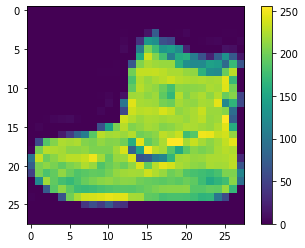

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False) # False: không set lưới


Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

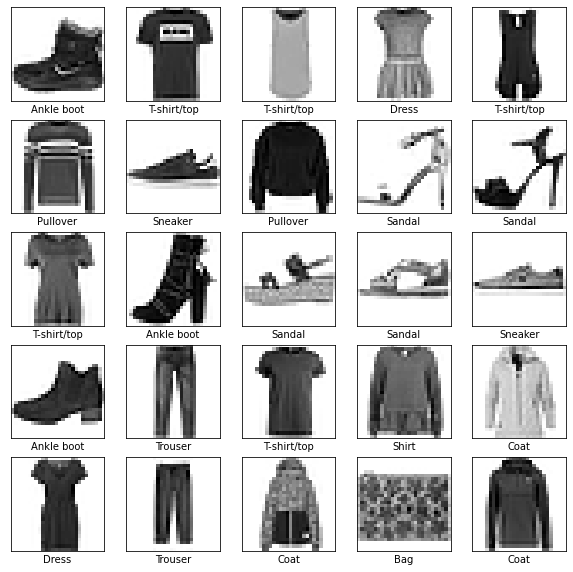

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#**5. Build the model**

###**Set up the layers**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels)-matrix to a one-dimensional array (of 28 * 28 = 784 pixels)-dọc. 

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.



###**Compile the model**

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction. 
==> Find parameters to minimize the loss function which is the convex fuction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam', #optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss function : Crossentropy
              metrics=['accuracy']) #metric

#**6. Train the model**


Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


###**Feed the model**

In [ ]:
model.fit(train_images, train_labels, epochs=10, batch_size = 100, verbose = 1, shuffle=False) 

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.5410 - accuracy: 0.8142
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4035 - accuracy: 0.8583
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3639 - accuracy: 0.8711
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8796
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3164 - accuracy: 0.8864
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3010 - accuracy: 0.8907
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2880 - accuracy: 0.8958
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2764 - accuracy: 0.8997
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.9031
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2564 - accuracy: 0.9067




---
*COMMENT*

Reference: https://machinelearningmastery.com/use-different-batch-sizes-training-predicting-python-keras/

**epochs, batch_size:**
Vd: epochs = 10, batch_size = 100
- Mỗi lần học, model sẽ học 100 bức ảnh (batch_size) trước --> học tiếp 100 bức ảnh sau --> 100 bức ảnh tiếp theo -->... Model sẽ học quét hết đủ 6000 bức ảnh trong training set.
- Model sẽ học 10 lần (epochs) như vậy.

**verbose = 1:**
Hiển thị tiến trình model nó đã ăn được bao nhiêu phần trăm dữ liệu.

**shuffle = False:**
- True  = trộn dữ liệu sau mỗi lần epoch.
- False = không trộn dữ liệu.

---



###**Evaluate accuracy**

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3562 - accuracy: 0.8716

Test accuracy: 0.8715999722480774


###**Make predictions**

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. 

A prediction is an array of 10 numbers.  Let's take a look at the first prediction:



In [ ]:
predictions[0]

array([1.64559533e-05, 3.89162436e-09, 4.54657766e-07, 1.03098614e-07,
       8.49099138e-07, 1.25316682e-03, 7.13745612e-06, 2.18217243e-02,
       8.08512210e-04, 9.76091683e-01], dtype=float32)



---

*COMMENT:*
Output là array gồm 10 thông số. Index: Chạy từ 0-->9 . Tại vị trí index thứ 9 có giá trị lớn nhất là 9.76091683e-01. 

==> Predict label = 9 


---



You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

 Examining the test label shows that this classification is correct:

In [34]:
test_labels[0]

9

Hàm vẽ hình

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### **Verify predictions**
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red.



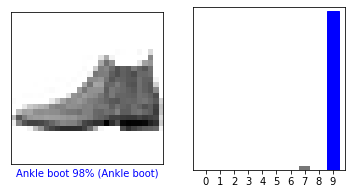

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

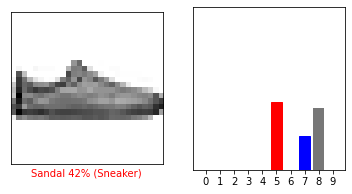

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

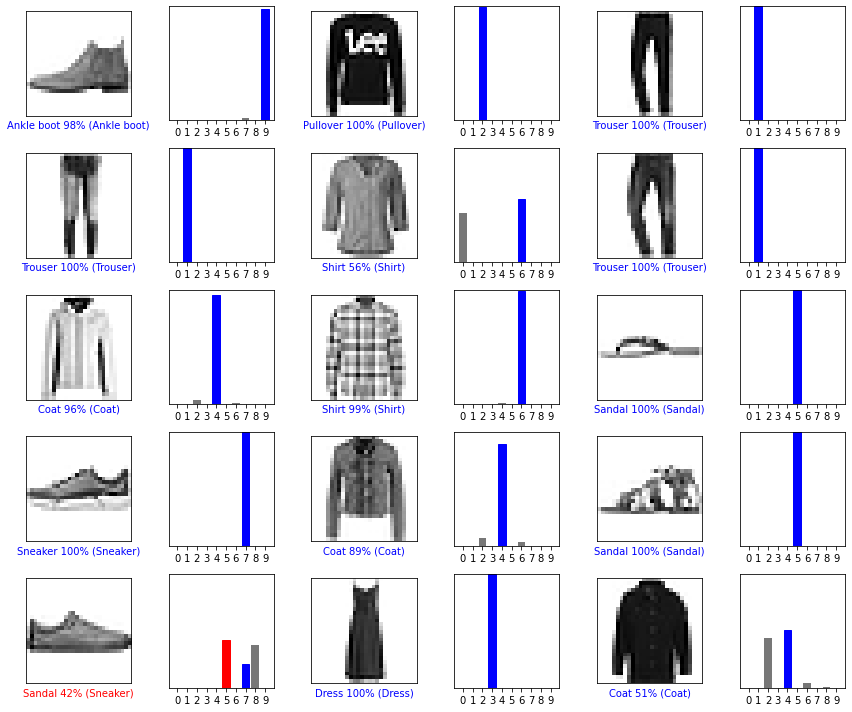

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#**7. Use the trained model**

Finally, use the trained model to make a prediction about a single image.

In [39]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [40]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [41]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.0681934e-04 3.9834979e-11 9.9516124e-01 1.4736821e-11 1.3157328e-03
  2.1394750e-16 3.1162810e-03 2.6618212e-13 1.8596737e-08 4.5836917e-15]]




---

*COMMENT*

You can see which label has the highest confidence value: 9.9516124e-01 (index=2)


---




Vẽ hình

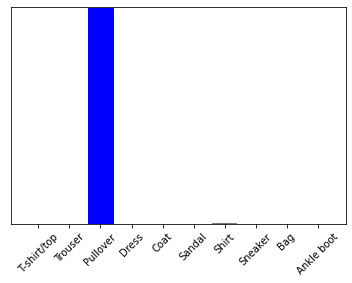

In [42]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)